In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
import nashpy as nash

In [4]:
def dx(x,t,A):   #criar a derivada
    f=np.dot (A,x) #f em cada momento do tempo
    phi=np.dot(f,x)
    return x*(f-phi)

In [12]:
t=np.linspace(0,100,1000)
A=np.array([[4,3,2],[2,1,5],[6,0,3]])
xs= odeint(func= dx, y0=[1/3,1/3,1/3], t=t, args=(A,)) # criar todos os x em relação ao tempo  y0=onde a população começa

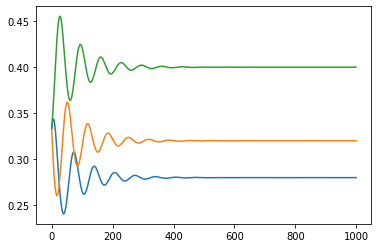

In [13]:
plt.plot(xs)

In [14]:
#war=np.array([[558.23, 558.23],[583.37, 581.28]]) ## 50 dólares o barril
war=np.array([[1281.59, 1281.59],[1282.32, 1278.39]])  ##72 dólares o barril
#war=np.array([[1557.41, 1557.41],[1557.41, 1553.52]]) ## 80 dólare o barril

In [15]:
epsilon = 10 ** -1
xs= odeint(func= dx, y0=[1-epsilon, epsilon], t=t, args=(war,)) # criar todos os x em relação ao tempo  y0=onde a população começa

In [32]:
xs= odeint(func= dx, y0=[1-epsilon, epsilon], t=t, args=(war,))

In [35]:
xs= odeint(func= dx, y0=[1-epsilon, epsilon], t=t, args=(war,))

In [36]:
xs[-1]

array([0.81424936, 0.18575064])

In [105]:
game = nash.Game(war, war.transpose())
list(game.support_enumeration())

[(array([1., 0.]), array([0., 1.])),
 (array([0., 1.]), array([1., 0.])),
 (array([0.81424936, 0.18575064]), array([0.81424936, 0.18575064]))]

In [106]:
xs

array([[0.9       , 0.1       ],
       [0.8969778 , 0.1030222 ],
       [0.89398715, 0.10601285],
       ...,
       [0.81424936, 0.18575064],
       [0.81424936, 0.18575064],
       [0.81424936, 0.18575064]])

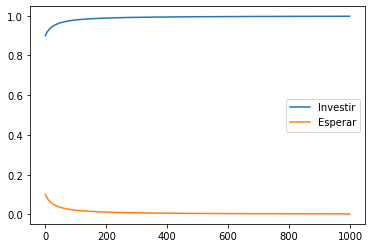

In [100]:
plt.plot(xs)
plt.legend(['Investir','Esperar'])

[]

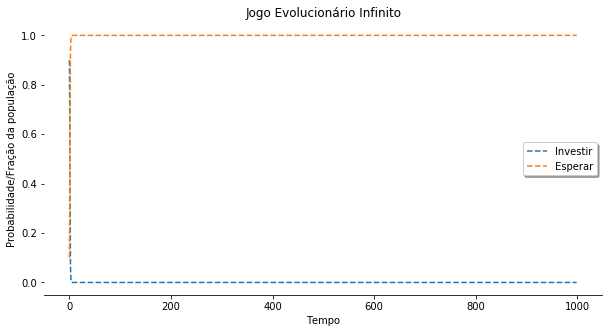

In [96]:
#####Figuras #####
fig,ax = plt.subplots(1,1, figsize=(10,5))
sns.despine(left=True)


ax.plot(xs, ls='--' )


ax.legend(['Investir','Esperar'], loc='center right', shadow=True)
ax.set_ylabel('Probabilidade/Fração da população')
ax.set_xlabel('Tempo')
ax.set_title('Jogo Evolucionário Infinito')
plt.plot()

[]

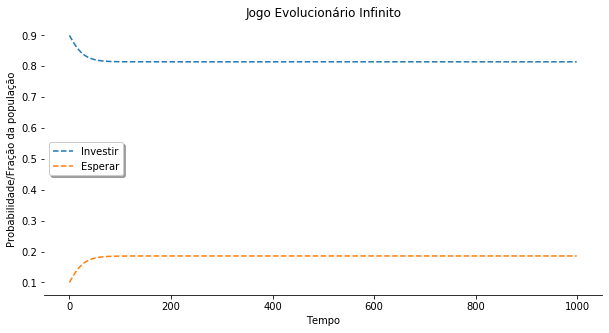

In [90]:
#####Figuras#####
fig,ax = plt.subplots(1,1, figsize=(10,5))
sns.despine(left=True)


ax.plot(xs, ls='--' )


ax.legend(['Investir','Esperar'], loc='center left', shadow=True)
ax.set_ylabel('Probabilidade/Fração da população')
ax.set_xlabel('Tempo')
ax.set_title('Jogo Evolucionário Infinito')
#ax.set_xlim(right=72)
#ax.set_xlim(left=71)

#ax.set_ylim(top=1300)
#ax.set_ylim(bottom=1250)
#ax2.set_title('Opção de Investir em função do Preço')

plt.plot()

[]

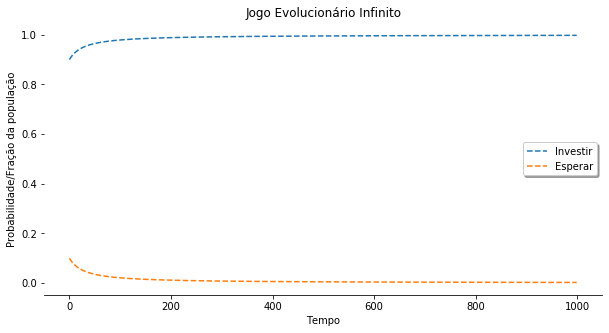

In [101]:
#####Figuras #####
fig,ax = plt.subplots(1,1, figsize=(10,5))
sns.despine(left=True)


ax.plot(xs, ls='--' )


ax.legend(['Investir','Esperar'], loc='center right', shadow=True)
ax.set_ylabel('Probabilidade/Fração da população')
ax.set_xlabel('Tempo')
ax.set_title('Jogo Evolucionário Infinito')
plt.plot()

In [307]:
def dxdy(entrada,t,A,B):#criar a derivada
    x=[entrada[0],1-entrada[0]]
    y=[entrada[1],1-entrada[1]]
    x_v=np.array(x)
    x_v=x_v.reshape((1,2))
    ###parametro do dxtt
    fid=np.dot(A,y)[0]
    fed=np.dot(A,y)[1]
    ###parametro do dytt
    #print(B,x_v, x_v.shape)
    fih=np.dot(x_v,B)[0,0]
    feh=np.dot(x_v,B)[0,1]
    
    
    #print(fb)
    dxdt=x[0]*(1-x[1])*(fid-fed)
    dydt=y[0]*(1-y[1])*(fih-feh)
    return [dxdt, dydt]

In [308]:
x0=[1-2*epsilon,1-2*epsilon]


In [309]:
x0

[0.8, 0.8]

In [310]:
A=np.array([[1281.59, 1281.59],[1282.32, 1278.39]])
B=A.transpose()
    

In [320]:
dxdy([0.5,0.5],10, A,B)[0]

0.308749999999975

In [318]:
np.linalg.norm(np.array(dxdy([0.5,0.5],10, A,B)))

0.43663843738265773

In [317]:
np.linalg.

array([0.30875, 0.30875])

In [ ]:
xs=odeint(dxdy,x0,t,args=(A,B))

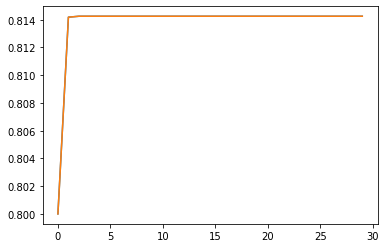

In [294]:
plt.plot(xs)

In [636]:
X = np.arange(0, 1, .01)
Y = np.arange(0, 1, .01)
#U, V = np.meshgrid(X, Y)

In [608]:
U=np.zeros((len(X),len(Y)))
V=np.zeros((len(X),len(Y)))

for j in range(len(Y)):
    for i in range(len(X)):
        U[i,j]=dxdy([X[i],Y[j]],10, A,B)[0]
        V[i,j]=dxdy([X[i],Y[j]],10, A,B)[1]
        


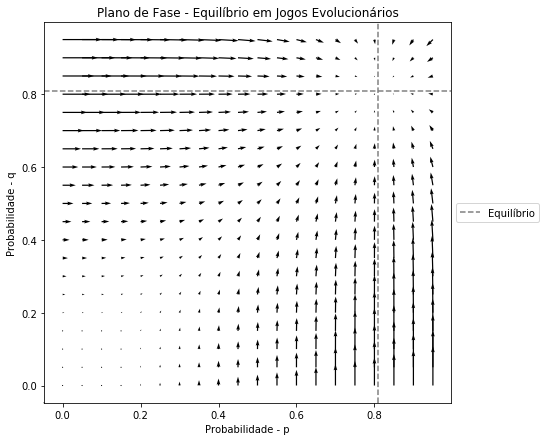

In [609]:


fig, ax = plt.subplots(figsize=(7.3,7))
q = ax.quiver(X, Y, U, V)
ax.quiverkey(q, X=0, Y=0, U=0,label='', labelpos='E')
ax.axhline(0.81, linestyle='--', color='grey')
ax.axvline(0.81, linestyle='--', color='grey')
ax.set_title('Plano de Fase - Equilíbrio em Jogos Evolucionários')
ax.set_xlabel('Probabilidade - p')
ax.set_ylabel('Probabilidade - q')
ax.legend(['Equilíbrio',],loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()

In [610]:
C=np.array([[1212.64,1212.64], [1213.05,1209.61]])

In [611]:
D=np.array([[1537.10,1538.75],[1537.10,1533.27]])

In [612]:
U=np.zeros((len(X),len(Y)))
V=np.zeros((len(X),len(Y)))

for j in range(len(Y)):
    for i in range(len(X)):
        U[i,j]=dxdy([X[i],Y[j]],10, C,D)[0]
        V[i,j]=dxdy([X[i],Y[j]],10, C,D)[1]
        

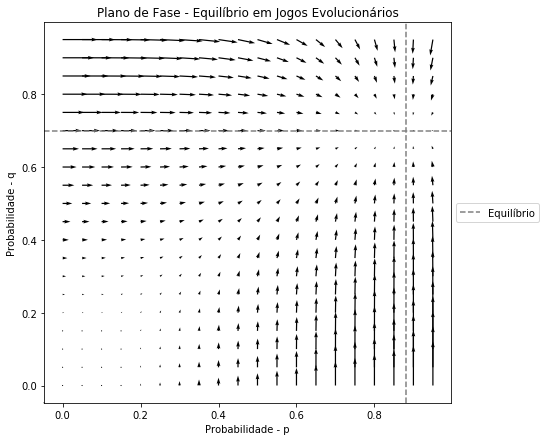

In [613]:


fig, ax = plt.subplots(figsize=(7.3,7))
q = ax.quiver(X, Y, U, V)
ax.quiverkey(q, X=0, Y=0, U=0,label='', labelpos='E')
ax.axhline(0.6989,linestyle='--', color='grey')
ax.axvline(0.8808,linestyle='--', color='grey')
ax.set_title('Plano de Fase - Equilíbrio em Jogos Evolucionários')
ax.set_xlabel('Probabilidade - p')
ax.set_ylabel('Probabilidade - q')
ax.legend(['Equilíbrio',],loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()

In [614]:
E=np.array([[558.23, 558.23],[583.37, 581.28]]) ## 50 dólares o barril
F=E.transpose()

In [615]:
U=np.zeros((len(X),len(Y)))
V=np.zeros((len(X),len(Y)))

for j in range(len(Y)):
    for i in range(len(X)):
        U[i,j]=dxdy([X[i],Y[j]],10, E,F)[0]
        V[i,j]=dxdy([X[i],Y[j]],10, E,F)[1]
        


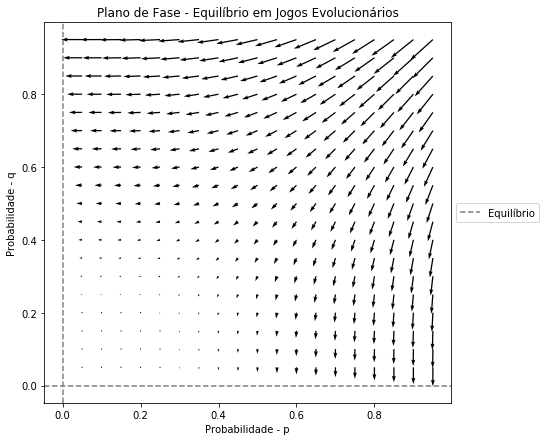

In [616]:


fig, ax = plt.subplots(figsize=(7.3,7))
q = ax.quiver(X[1:], Y[1:], U[1:,:-1], V[1:,:-1])
ax.quiverkey(q, X=0, Y=0, U=0,label='', labelpos='E')
ax.axhline(0,linestyle='--', color='grey')
ax.axvline(0,linestyle='--', color='grey')
ax.set_title('Plano de Fase - Equilíbrio em Jogos Evolucionários')
ax.set_xlabel('Probabilidade - p')
ax.set_ylabel('Probabilidade - q')
ax.legend(['Equilíbrio',],loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [617]:
U[1,:-1]

array([-0.057625  , -0.05788625, -0.0581475 , -0.05840875, -0.05867   ,
       -0.05893125, -0.0591925 , -0.05945375, -0.059715  , -0.05997625,
       -0.0602375 , -0.06049875, -0.06076   , -0.06102125, -0.0612825 ,
       -0.06154375, -0.061805  , -0.06206625, -0.0623275 ])

In [618]:
U.shape

(20, 20)

In [619]:
E=np.array([[1557.41, 1557.41],[1557.41, 1553.52]]) ## 80 dólare o barril
F=E.transpose()

In [620]:
U=np.zeros((len(X),len(Y)))
V=np.zeros((len(X),len(Y)))

for j in range(len(Y)):
    for i in range(len(X)):
        U[i,j]=dxdy([X[i],Y[j]],10, E,F)[0]
        V[i,j]=dxdy([X[i],Y[j]],10, E,F)[1]
        


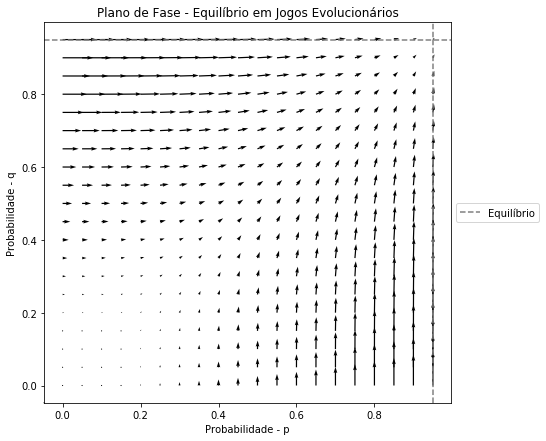

In [621]:
fig, ax = plt.subplots(figsize=(7.3,7))
q = ax.quiver(X, Y, U, V)
ax.quiverkey(q, X=0, Y=0, U=0,label='', labelpos='E')
ax.axhline(0.95,linestyle='--', color='grey')
ax.axvline(.95,linestyle='--', color='grey')
ax.set_title('Plano de Fase - Equilíbrio em Jogos Evolucionários')
ax.set_xlabel('Probabilidade - p')
ax.set_ylabel('Probabilidade - q')
ax.legend(['Equilíbrio',],loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()

In [632]:
J=np.array([[1912.80,1912.80], [1913.80,1911.41]])

In [633]:
K=np.array([[1217.55,1219.07], [1217.55,1214.51]])

In [637]:
U=np.zeros((len(X),len(Y)))
V=np.zeros((len(X),len(Y)))

for j in range(len(Y)):
    for i in range(len(X)):
        U[i,j]=dxdy([X[i],Y[j]],10, J,K)[0]
        V[i,j]=dxdy([X[i],Y[j]],10, J,K)[1]
        


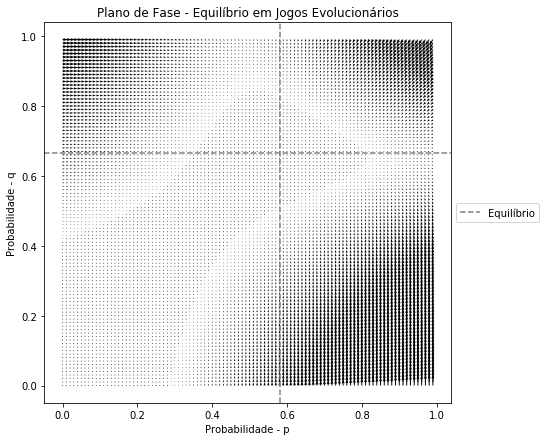

In [638]:
fig, ax = plt.subplots(figsize=(7.3,7))
q = ax.quiver(X, Y, U, V)
ax.quiverkey(q, X=0, Y=0, U=0,label='', labelpos='E')
ax.axhline(0.6666,linestyle='--', color='grey')
ax.axvline(.5815,linestyle='--', color='grey')
ax.set_title('Plano de Fase - Equilíbrio em Jogos Evolucionários')
ax.set_xlabel('Probabilidade - p')
ax.set_ylabel('Probabilidade - q')
ax.legend(['Equilíbrio',],loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()